# Discrete signals, the Discrete Fourier Transform and the Fast Fourier Transform 

## Discrete signals and the Fourier series

When we deal with audio signals, we are in many cases dealing with discrete, sampled data, as e.g. extracted with an analogue-to-digital converter (ADC) unit. 

Typically, the voltage produced by a sensor is picked up at regular time intervals of $\Delta t$. This corresponds to a sampling frequency $$f_s=\frac{1}{\Delta t}$$ in samples per second. In doing so, we lose information between each sample, which has profound consequences to how we obtain and interpret frequency information.

If the input analogue signal is a continuous function $s(t)$, an output sampled signal is a sequence of real numbers $s[k]$, taken at discrete time steps $t[k]$:

$$
t[k] = k \Delta t, \quad k = 0, 1, 2, \dots, N-1
$$

With $N$ being the total number of samples. The total length of the signal from the first to the last sample is $T=(N-1)\Delta t$.

If we wanted to extract frequency information from this signal, we need to be able to carry out some form of Fourier transform. However in the discrete domain we will find ourselves dealing with quite a different beast. 

For Fourier analysis to work, we want to first check that we can expand the sequence $s[k]$ into a series of mutually orthogonal basis functions as we have done with functions. 

Since we're supposedly looking at a function over the interval $[0, T]$ we (naively) choose basis functions with period $T$:

$$
\cos\left(\frac{2\pi n}{T} k \Delta t\right) \quad \sin\left(\frac{2\pi n}{T} k \Delta t \right) 
$$

We can expand the expression for the period $T$:

$$
\cos\left(\frac{2\pi n}{N-1} k \right) \quad \sin\left(\frac{2\pi n}{N-1} k \right) 
$$

Now we see that such functions each define a sequence of numbers periodic in $N-1$, **in terms of sample indices $k$ and not physical time $t[k]$**. With our choice of period $T$, the first and last values are exactly one period apart, and so are the same:

$$
\begin{aligned}
k = 0 &\Rightarrow \cos(0) \\
k = N-1 &\Rightarrow \cos\left(\frac{2\pi n}{N-1}(N-1)\right) = \cos(2\pi n) = \cos(0)
\end{aligned}
$$

But since our signal (we assume) can be written as a linear combination of these basis functions, we would force a constraint on $s[k]$ that may not hold: that the first and last samples must be equal. So to represent the full sequence without this constraint, we should instead choose functions periodic in $N$. Since there are $N$ samples spaced $\Delta t$ apart, it is more convenient to redefine the time interval as:

$$
T := N\Delta t
$$

This way, the signal duration includes one sample period per sample, aligning with periodicity $N$. And so we now have basis sequences periodic over $N$ (we'll also introduce some shorthand notation):

$$
\cos_n[k] := \cos\left(\frac{2\pi n}{N} k \right) \quad \sin_n[k] :=\sin\left(\frac{2\pi n}{N} k \right) 
$$

So that for the reconstructed signal we have $s[0] \ne s[N-1]$. Why start with such a mistake? Because being off by one is part and parcel of operating in the discrete world. 

We are in effect behaving as if the sequence $s[k]$ was periodic, with period $N$ so that $s[k]=s[k+N]$ (in much the same way as a Fourier series behaves in the continuous domain). 

We might think we need an infinite number of terms to represent the signal. But this is infinitely redundant! In fact, we find that for $n\geq N$ the basis functions start to repeat. For example, with $n=N$ we have:

$$
\sin\left(\frac{2\pi N}{N} k \right) = \sin\left(2\pi k \right) = \sin(0) = 0
$$

Which is the same as a sine term for $n=0$. For $n=N+1$ we have:

$$
\sin\left(\frac{2\pi (N+1)}{N} k \right) = \sin\left(\frac{2\pi k }{N} + 2\pi k \right) = \sin\left(\frac{2\pi k }{N} \right) 
$$

which is equal to the term for $n=1$. We can continue and find that for $n\geq N$ there are no more unique basis functions, we have:

$$
\cos_{n+N}[k] = \cos_n[k] \quad \sin_{n+N}[k] = \sin_n[k]  
$$

In other words, another periodicity is appearing: the set of basis functions is **periodic in $n$** with period $N$, so for all integers $m$ we have:

$$
\cos_{n+mN}[k] = \cos_n[k] \quad \sin_{n+mN}[k] = \sin_n[k]  
$$

Equivalently, 

$$\cos_n[k] = \cos_{m}[k], \quad \sin_n[k] = \sin_{m}[k]  \quad \text{whenever } n \equiv m \quad \pmod{N}$$ 

And $s[k]$ can be reconstructed **in its entirety by using $N$ harmonics** (including the constant term $cos_0[k]=1$). 

Now, armed with a finite number of unique basis functions and correct periodicity, we're finally ready for a discrete Fourier series representation of the sequence $s_k$:

$$
\boxed{
s[k] = \sum_{n=0}^{N-1} \left[a_n\cos\left(\frac{2\pi n}{N}k\right) + b_n\sin\left(\frac{2\pi n}{N} k\right)\right] \tag {1}
}$$


This formula reconstructs the signal from its Fourier coefficients $a_n$ and $b_n$, and plays the role of the **inverse Fourier transform** for real-valued signals (since we won't be able to extend the signal to infinity). 

The frequencies of each basis are in integer multiple ratios as we expect for a Fourier series:

$$
f_n = \frac{n}{N \Delta t} = \frac{n}{N} f_s
$$

By setting $n=1$ we find the frequency spacing between modes is dependent only on the length of the signal $T$. 

$$
\Delta f = \frac{f_s}{N} = \frac{1}{N \Delta t} = \frac{1}{T}
$$

This result is not exactly surprising, in light of our study of the Fourier series. For the vibrating string of length $L$, the modes are spaced at frequencies $1/L$ apart (detail in the notebook on [Fourier series and transforms](Fourier.ipynb) and [Waves](Waves.ipynb)). But when analysing signals, one might still be surprised that **increasing the sample rate $f_s$ does not increase the frequency resolution!** It only extends the bandwidth, so that higher frequencies can be extracted.

What is the maximum frequency of the sinusoids? We could try to plug in $n=N-1$ and find that the highest frequency approaches the sampling frequency $f_s$ for large values of $N$:

$$
f_{N-1} =  \frac{(N-1)}{N\Delta t} \approx \frac{1}{\Delta t} = f_s
$$

However, due to periodicity, not all of the frequencies up to $f_s$ are truly distinct. In fact, above half the sampling rate $f_s/2$ they fold back and become indistinguishable from negative frequencies! 
If we look at $n<0$ we will see:

$$
\sin\left(2\pi \frac{-n+N}{N}k\right) = \sin\left(-2\pi \frac{n}{N}k +2\pi k\right)=  \sin\left(-2\pi \frac{n}{N}k\right) = -\sin\left(2\pi \frac{n}{N}k\right) 
$$

$$
\cos\left(2\pi \frac{-n+N}{N}k\right) =  \cos\left(-2\pi \frac{n}{N}k+ 2\pi k\right ) = \cos\left(2\pi \frac{n}{N}k\right) 
$$

Basis functions for $n>N/2$ are not unique, and correspond to lower frequencies (with a sign reversal, so they are technically negative frequency components): 

$$\cos_{N-n}[k] = \cos_n[k] \quad \sin_{N-n}=-\sin_n[k]$$

$f_N=f_s/2$ is the so-called *Nyquist frequency* (or *limit*). This tells us that we need to sample our signal at at least twice the highest frequency of interest otherwise we lose useful information. 

Either side of the index $n=N/2$, the coefficients are mirrored, with the sine coefficients having opposite values either side. The zeroth coefficient of the cosine is $a_0$, and corresponds to the mean value of the signal. 

If $N$ is even, then $n=N/2$ is a valid index, and it produces one unique coefficient, with $\cos_{N/2}[k]$ having a frequency exactly equal to $f_N=f_s/2$:

$$f_{N/2} = \frac{f_s}{2}$$

At the same index $N/2$ the value of $\sin_{N/2}[k]$ is zero:

$$\sin_{N/2}[k] = \sin\left(2\pi \frac{N}{2N} k\right) = \sin\left(\pi k\right) = 0 $$

and so $\cos_{N/2}[k]$ and $\cos_{0}[k]=1$ stand alone, having neither a mirrored cosine at another index, nor a sine partner at the same index.

So to represent a real signal, about half of the coefficients $a_n$ and $b_n$ are redundant! We could in fact re-write the discrete Fourier series with fewer terms without loss of information, by changing the upper limit to $N/2$ if $N$ is even or $N/2-1$ if odd. We would, in this case, need to pay special attention to how the $n=0$ and $n=N/2$ coefficients are obtained though.

So on we go to extract the coefficients of the series. We should expect the inner products in the discrete domain to be sums rather than integrals.

$$
a_n = \frac{1}{N}\sum_{k=0}^{N-1} s[k] \cdot \cos\left( \frac{n \pi}{N}k\right)
$$

$$
b_n = \frac{1}{N}\sum_{k=0}^{N-1} s[k] \cdot \sin\left( \frac{n \pi}{N}k\right)
$$

These correspond to the discrete Fourier sine and cosine transforms (though they are not shown here in their most typical form).

We find here that the zeroth coefficient $a_0$ is identical to the signal mean $\langle s[k] \rangle$:

$$
a_0 = \frac{1}{N} \sum_{k=0}^{N-1} s[k] = \langle s[k] \rangle
$$

As for the other coefficients, if this works in the same way as a regular Fourier transform, we should expect:

* $\cos_n[k]$ and $\sin_n[k]$ to form an orthogonal set, so that e.g. $\sum \cos_m[k] \cos_n[k] = 0$ for $m\ne n$



them to form an orthogonal basis so that this sum returns zero where the signal is not aligned.

So, for instance would expect a signal $s$ like
$$
s[k] = \cos\left(\frac{2\pi m k}{N}\right) \quad \text{for } m \in \{1,2,3,...\}
$$

to give us up to two non-zero coefficients, $a_m$ and $a_{N-m}$. For values of $m>N/2$ we should expect the same result, except the non-zero coefficients will correspond to an *alias* of the true signal frequency, between 0 and $f_s/2$.

so that scaling $a_0/2$ is not needed for the discrete Fourier series of Eq. 2.

Below we have some code producing a random sequence `s` of length `N`, and then using the discrete Fourier sine and cosine transforms shown above to obtain the coefficients $a_n$ and $b_n$. We should be able to verify how the coefficients are related, that sinusoidal signals of the right period $N$ to  and we can try to input different kinds of signals and see their sine and cosine spectra. Of particular interest are pure sinusoidal signals.  We can that high values of $m>N-1$ "wrap around" and show up as their lower frequency *aliases*. If they are not (for instance a frequency in between one of the bins) what do we see?

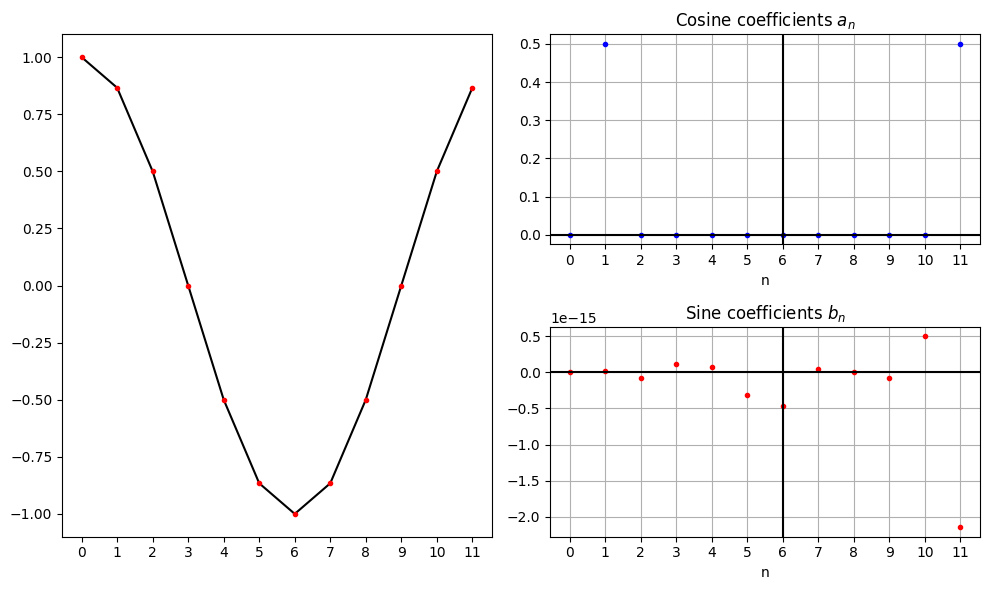

In [156]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec

N = 12 # number of samples 
k = np.arange(0,N) # k from 0 to N-1

s = np.cos(2*np.pi*k/N) # the signal s[k]; one cosine is used here, with some added noise. Try inputting different functions of k and observe the result  

scos = np.zeros(N)
ssin = np.zeros(N)

an = np.zeros(N)
bn = np.zeros(N)

for n in range(N):
    # extract coefficients (the DFT)
    an[n] = 1/N * np.sum(s*np.cos(2*np.pi*n*k/N))
    bn[n] = 1/N * np.sum(s*np.sin(2*np.pi*n*k/N))
    
    # reconstruct the signal from its (discrete) Fourier series
    scos = scos + an[n]*np.cos(2*np.pi*n*k/N)
    ssin= ssin + bn[n]*np.sin(2*np.pi*n*k/N)
    
sr = scos+ssin # total reconstructed signal

fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 2, width_ratios=[1, 1]) 

ax1 = fig.add_subplot(gs[:,0])
ax1.plot(s, 'k')
ax1.plot(sr, 'r.')
ax1.set_xticks(k)

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(an, 'b.')
ax2.axhline(0, color='k')
ax2.axvline(N/2, color='k')
ax2.set_title('Cosine coefficients $a_n$')
ax2.set_xlabel('n')
ax3 = fig.add_subplot(gs[1,1], sharex=ax2)
ax3.plot(bn, 'r.')
ax3.axhline(0, color='k')
ax3.axvline(N/2, color='k')
ax3.set_title('Sine coefficients $b_n$')
ax3.set_xlabel('n')
ax3.set_xticks(k)

ax3.grid()
ax2.grid()
fig.tight_layout()
plt.show()

#ax2.plot(np.fft.fft(sk), 'r')


## The standard DFT

So far we have shown a form of Fourier series 

## The Fast Fourier Transform

